## **Importing Basic Packages**

In [1]:
# Importing and Filtering Future Warning
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

# Imporint/Installing Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install xgboost # Installing XGBoost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Mounting Google Drive**

In [2]:
# Mount your Google Drive to Colab
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# **Business Case: Insurance Cost Prediction**
Predicting the Insurance Cost based on the "Age", "Sex", "BMI", "Children", "Smoker" and "Region" information.

## **Reading the Data and Looking at Basic Checks**

In [3]:
# Load the Dataset, print the shape and Looking at first five rows of the Dataset
df = pd.read_csv("/content/drive/MyDrive/Intern Projects/PRCP_1021_InsCostPred/insurance_cost.csv", sep = ",")
print(df.shape)
df.head(5)

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Checking the Info of the DataFrame
df.info()

# There is no null value in any of the column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Checking the Summary Statistics for numeric columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## **Data Preprocessing**

### Dropping Leaky Columns

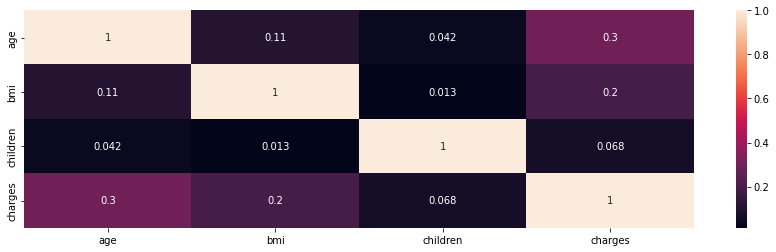

In [6]:
# Setting the Figure Size and Displaying Heatmap
plt.figure(figsize = (15, 4))
sns.heatmap(round(df.corr(), 3), annot = True);

### Removing Multicollinearity

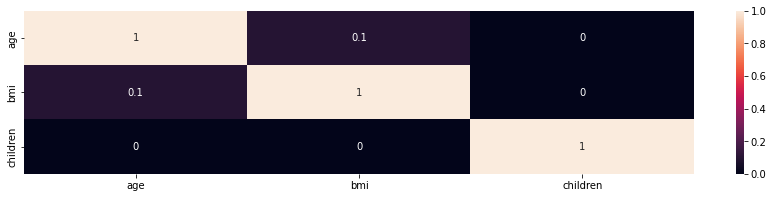

In [7]:
# Checking for Autocorrelation within the input features
auto_corr = df.drop(columns = "charges")

# Setting the Figure Size and Displaying Heatmap
plt.figure(figsize = (15, 3))
sns.heatmap(round(auto_corr.corr(), 1), annot = True);

### Removing Outliers

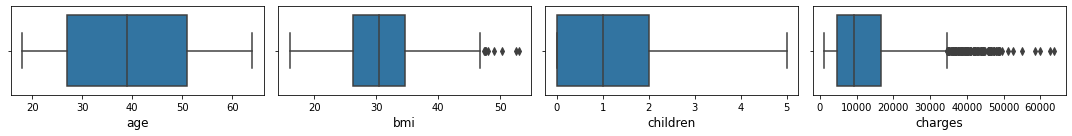

In [8]:
# Checking for Outlier within Numeric Features
plt.figure(figsize = (15, 2))

plotnumber = 1
for column in df.select_dtypes("number"):
  if plotnumber <= len(df.select_dtypes("number").columns):
    ax = plt.subplot(1, 4, plotnumber)
    sns.boxplot(x = df[column])
    plt.xlabel(column, fontsize = 12)
    plotnumber += 1
plt.tight_layout()

In [9]:
# # Removing Outliers from "bmi" feature
# low, high = df["bmi"].quantile([0.0, 0.98])
# mask_bmi = df["bmi"].between(low, high)
# df = df[mask_bmi]

# Removing Outliers from "charges" features
df = df[df["charges"] < 50000]

print(df.shape)

(1331, 7)


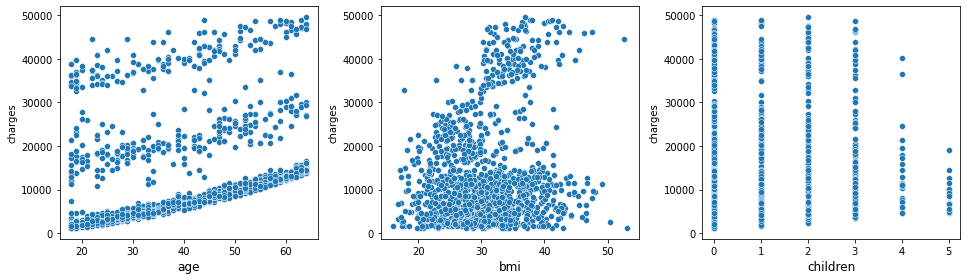

In [10]:
# Checking for remaining Outlier within Numeric Features
plt.figure(figsize = (18, 4))

plotnumber = 1
for column in df.drop(columns = "charges").select_dtypes("number"):
  if plotnumber <= len(df.drop(columns = "charges").select_dtypes("number").columns):
    ax = plt.subplot(1, 4, plotnumber)
    sns.scatterplot(x = df[column], y = df["charges"])
    plt.xlabel(column, fontsize = 12)
    plotnumber += 1
plt.tight_layout()

In [11]:
# # Removing Outliers
# mask1 = ((df["age"] < 40) & (df["charges"] > 10000)) == False
# mask2 = ((df["age"] < 45) & (df["charges"] > 12000)) == False
# mask3 = ((df["age"] < 20) & (df["charges"] > 6000)) == False
# df = df[mask1 & mask2 & mask3]

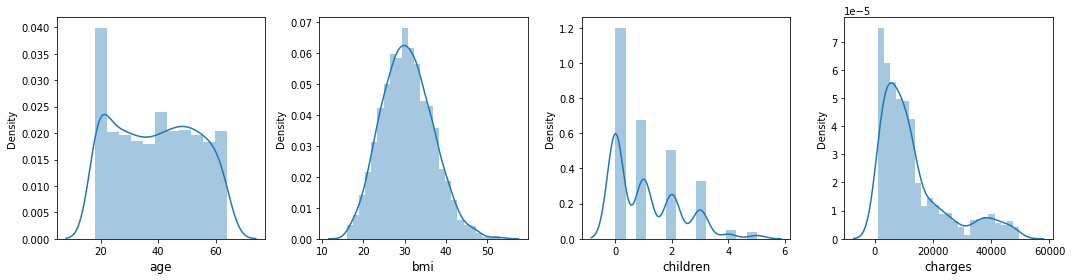

In [12]:
# Checking for the Distribution of the Numeric Features
plt.figure(figsize = (15, 4))

plotnumber = 1
for column in df.select_dtypes("number"):
  if plotnumber <= len(df.select_dtypes("number").columns):
    ax = plt.subplot(1, 4, plotnumber)
    sns.distplot(x = df[column])
    plt.xlabel(column, fontsize = 12)
    plotnumber += 1
plt.tight_layout()

## **Feature Selections**

### Low & High Cardinalities

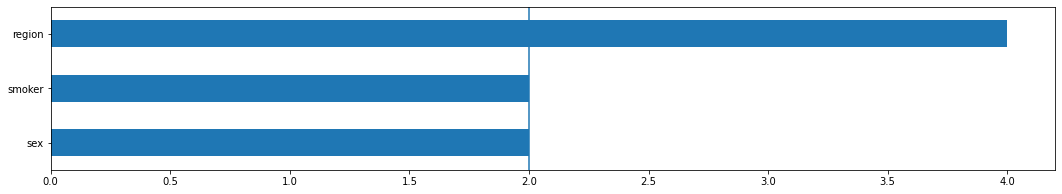

In [13]:
# Checking for the low and high cardinality features
plt.figure(figsize = (18, 3))
df.drop(columns = "charges").select_dtypes("object").nunique().plot(kind = "barh")
plt.axvline(int((df.drop(columns = "charges").select_dtypes("object").nunique().mean())));

In [14]:
# Checking the Unique Valsue per Column
for column in df.drop(columns = "charges").select_dtypes("object"):
  print(df[column].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


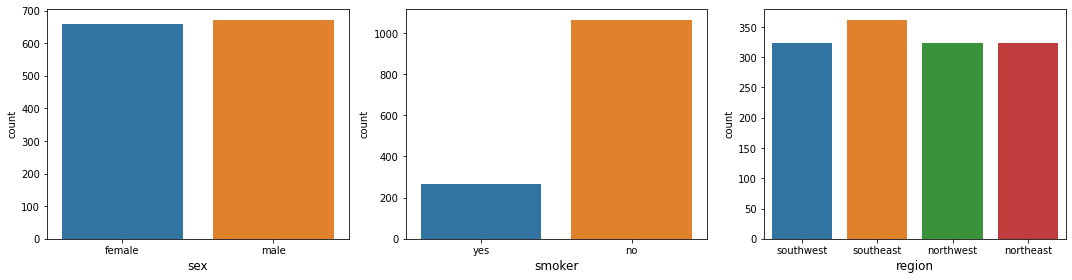

In [15]:
# Checking for Outlier within Numeric Features
plt.figure(figsize = (15, 4))

plotnumber = 1
for column in df.drop(columns = "charges").select_dtypes("object"):
  if plotnumber <= len(df.drop(columns = "charges").select_dtypes("object").columns):
    ax = plt.subplot(1, 3, plotnumber)
    sns.countplot(x = df[column])
    plt.xlabel(column, fontsize = 12)
    plotnumber += 1
plt.tight_layout()

In [16]:
# Manipulating the "region" feature
df["region"] = np.where(df["region"] == "southwest", "south", df["region"])
df["region"] = np.where(df["region"] == "southeast", "south", df["region"])
df["region"] = np.where(df["region"] == "northwest", "north", df["region"])
df["region"] = np.where(df["region"] == "northeast", "north", df["region"])
df["region"].unique()

# # Dropping the "smoker" features (has no variance and importance base on the model)
# df.drop(columns = "smoker", inplace = True)
# # df.drop(columns = "age", inplace = True)

array(['south', 'north'], dtype=object)

## **Model Creation**

### Importing Required Packages

In [17]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Splitting the DataFrame Vertically

In [18]:
# Vertical Split: Splitting the Input and Output Features
target = "charges"
X = df.drop(columns = target)
y = df[target]

### Transforming Categorical Features

In [19]:
col_tran = make_column_transformer(
    (OneHotEncoder(), list(X.select_dtypes("object").columns)), 
    (RobustScaler(), list(X.select_dtypes("number").columns)),
    remainder = "passthrough")

col_tran.fit_transform(X)

array([[ 1.        ,  0.        ,  0.        , ..., -0.8       ,
        -0.28699284, -0.5       ],
       [ 0.        ,  1.        ,  1.        , ..., -0.84      ,
         0.41348449,  0.        ],
       [ 0.        ,  1.        ,  1.        , ..., -0.44      ,
         0.32159905,  1.        ],
       ...,
       [ 1.        ,  0.        ,  1.        , ..., -0.84      ,
         0.78102625, -0.5       ],
       [ 1.        ,  0.        ,  1.        , ..., -0.72      ,
        -0.5375895 , -0.5       ],
       [ 1.        ,  0.        ,  0.        , ...,  0.88      ,
        -0.1473747 , -0.5       ]])

### Splitting the DataFrame Horizontally

In [20]:
# Horizontal Split: Splitting the Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Printing the shape of the X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1064, 6)
(267, 6)
(1064,)
(267,)


### Baseline Model

In [21]:
# Training Baseline Accuracy
y_train_mean = y_train.mean()
base_acc_train = [y_train_mean] * len(y_train)

mae_baseline_train = mean_absolute_error(y_train, base_acc_train)
print("Train Mean House Price", round(y_train_mean, 2))
print("Train Baseline MAE:", round(mae_baseline_train, 2))

# Testing Baseline Accuracy
y_test_mean = y_test.mean()
base_acc_test = [y_test_mean] * len(y_test)

mae_baseline_test = mean_absolute_error(y_test, base_acc_test)
print("Test Mean House Price", round(y_test_mean, 2))
print("Test Baseline MAE:", round(mae_baseline_test, 2))

Train Mean House Price 12779.59
Train Baseline MAE: 8613.41
Test Mean House Price 14061.67
Test Baseline MAE: 9600.41


### EXtreme Gradient Boosting Regressor

In [22]:
# Build Normal Model
xgb_reg = make_pipeline(col_tran,
    XGBRegressor(random_state = 42, objective = "reg:linear")
).fit(X_train, y_train)

# Training and Testing Accuracy
acc_train = xgb_reg.score(X_train, y_train)
acc_test = xgb_reg.score(X_test, y_test)

# Printing the Training and Testing Accuracy
print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

[19:52:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Accuracy: 0.8909
Test Accuracy: 0.8819


### Cross Validation Scores

In [23]:
# Printing Cross Validation Score for "ranfor"
cvs_xgb_reg = cross_val_score(xgb_reg, X_train, y_train, cv = 5, n_jobs = -1)
print(cvs_xgb_reg)

[0.84105165 0.81766914 0.85383801 0.8854666  0.85410956]


### Grid Search Cross Validation

In [24]:
# Decision Tree Params
params = {
    "xgbregressor__colsample_bytree": np.arange(0.02, 0.04, 0.01),
    "xgbregressor__learning_rate": np.arange(0.02, 0.11, 0.02),
    "xgbregressor__max_depth": range(2, 4, 1),
    "xgbregressor__n_estimators": range(100, 501, 100)
}

# Grid Search Cross Validation
model = GridSearchCV(
    xgb_reg,
    param_grid = params,
    cv = 5,
    n_jobs = -1,
    verbose = 1,
    scoring = "r2"
).fit(X_train, y_train)

# Print the Best Score and Best Params
print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[19:52:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.7473698732276927
{'xgbregressor__colsample_bytree': 0.02, 'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 2, 'xgbregressor__n_estimators': 200}


In [25]:
# Printing the Training and Testing Mean Absolute Error
train_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, model.predict(X_test))
print("Train MAE:", round(train_mae, 4))
print("Test MAE:", round(test_mae, 4))

# Printing the Training and Testing Root Mean Squared Error
train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print("Train RMSE:", round(train_rmse, 4))
print("Test RMSE:", round(test_rmse, 4))

# Printing the Training and Testing R2 Score
train_r2 = r2_score(y_train, model.predict(X_train))
test_r2 = r2_score(y_test, model.predict(X_test))
print("Train R2 Score:", round(train_r2, 4))
print("Test R2 Score:", round(test_r2, 4))

Train MAE: 3849.985
Test MAE: 4299.4854
Train RMSE: 5560.3957
Test RMSE: 6142.0327
Train R2 Score: 0.7638
Test R2 Score: 0.7624


In [28]:
# Print the Cross Validation Results
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbregressor__colsample_bytree,param_xgbregressor__learning_rate,param_xgbregressor__max_depth,param_xgbregressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.049569,0.004610,0.006290,0.000155,0.02,0.02,2,100,"{'xgbregressor__colsample_bytree': 0.02, 'xgbr...",0.407442,0.385502,0.394606,0.402379,0.419675,0.401921,0.011567,97
1,0.073021,0.003750,0.006569,0.000519,0.02,0.02,2,200,"{'xgbregressor__colsample_bytree': 0.02, 'xgbr...",0.616006,0.605954,0.625849,0.633557,0.632520,0.622777,0.010482,89
2,0.140308,0.046637,0.011469,0.006511,0.02,0.02,2,300,"{'xgbregressor__colsample_bytree': 0.02, 'xgbr...",0.669739,0.659945,0.683620,0.698250,0.689349,0.680181,0.013718,81
3,0.217354,0.037694,0.012190,0.003662,0.02,0.02,2,400,"{'xgbregressor__colsample_bytree': 0.02, 'xgbr...",0.695363,0.688235,0.711399,0.732729,0.719090,0.709363,0.016044,75
4,0.244811,0.054384,0.016522,0.008434,0.02,0.02,2,500,"{'xgbregressor__colsample_bytree': 0.02, 'xgbr...",0.709988,0.703110,0.727228,0.754929,0.736036,0.726258,0.018542,63


### Communication

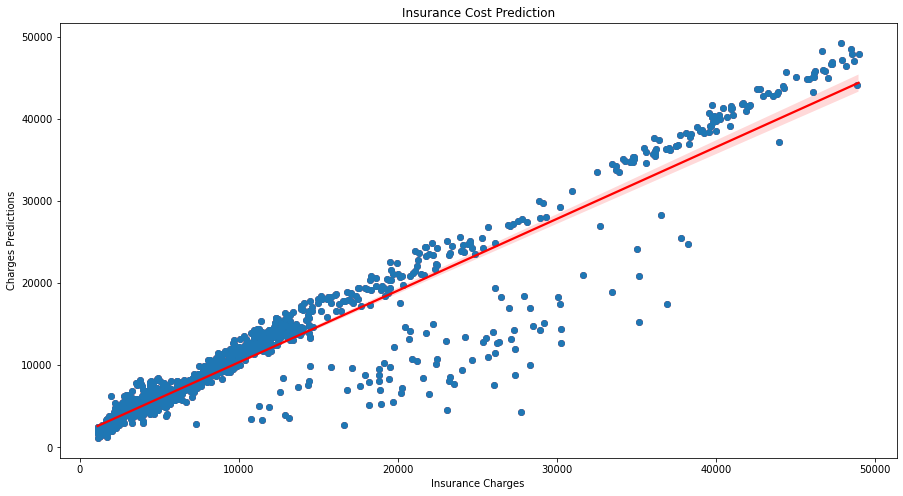

In [29]:
# Setting Canvas Size
plt.figure(figsize = (15, 8))

# Plotting y_train vs y_predict
sns.regplot(y_train, xgb_reg.predict(X_train), fit_reg = True, color = "red")
plt.scatter(y_train, xgb_reg.predict(X_train))
plt.xlabel("Insurance Charges")
plt.ylabel("Charges Predictions")
plt.title("Insurance Cost Prediction");

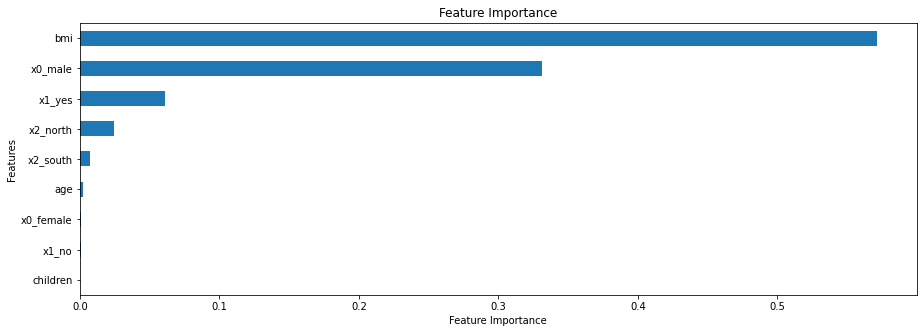

In [32]:
# Get feature names from training data

features = list(col_tran.named_transformers_["onehotencoder"].get_feature_names())
features.insert(0, "age")
features.insert(3, "bmi")
features.insert(4, "children")
features = features

# Extract importances from model
importances = model.best_estimator_.named_steps["xgbregressor"].feature_importances_

# Create a series with feature names and importances
feat_imp = pd.Series(importances, index = features).sort_values(ascending = True)

# Setting the Canvas Size
plt.figure(figsize = (15, 5))

# Plot 10 most important features
feat_imp.plot(kind = "barh")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance");

In [ ]:
model.best_estimator_.named_steps["xgbregressor"].feature_importances_

array([2.3041356e-03, 7.0339133e-04, 3.3136937e-01, 5.7142675e-01,
       3.4916427e-04, 5.4411974e-04, 6.1026081e-02, 2.4744784e-02,
       7.5321659e-03], dtype=float32)

### Conclustion
After trying different Regression Models, the Extreme Gradient Boosting Regressor (XGBR) is giving the best results, with the Training Accuracy of 89.09% and the Testing Accuracy of 88.19%. But the Scores has decreased after applying the Hyper Parameter Tuning (Training: 76.38% and Testing: 76.24%). Thus we will keep the Model without Hyper Parameter Tuning.